# Homework 5

**Joseph R. Livesey**

**November 18, 2021**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16

## Problem 1
### Part (a)

In [2]:
bkgd = stats.norm.rvs(scale=4., size=int(1e6))
sig  = stats.uniform.rvs(loc=0., scale=20., size=int(1e6))

data = bkgd + sig

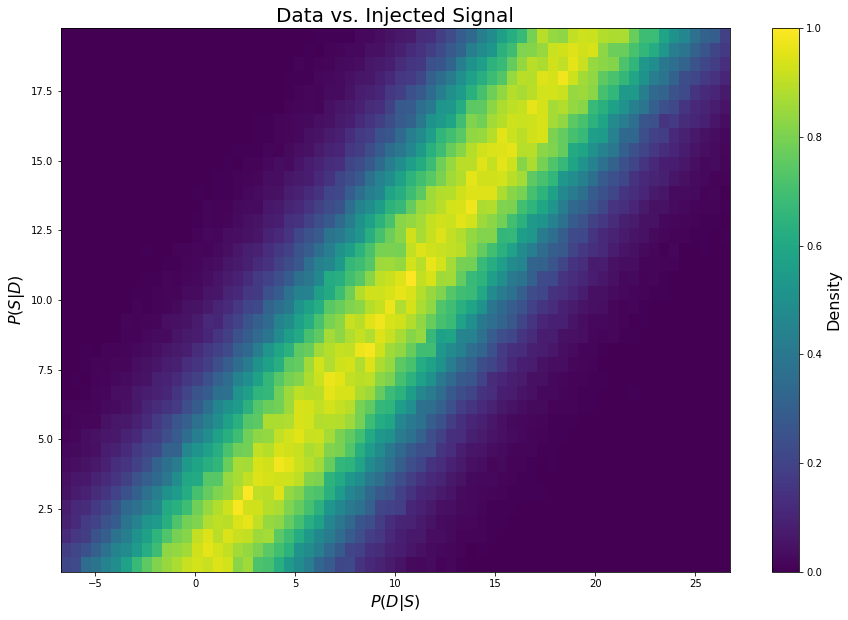

In [3]:
signaledges = np.linspace(0, 20, 40)
dataedges = np.linspace(-7, 27, 68)

Psd, temp, temp2 = np.histogram2d(data, sig, bins=[dataedges, signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T)
plt.title('Data vs. Injected Signal')
plt.ylabel(r'$P(S|D)$')
plt.xlabel(r'$P(D|S)$')
plt.colorbar(plt.cm.ScalarMappable(), label='Density');

### Part (b)

If we let the injected signal be equal to 10, we're plotting the histogram of $P(D|S=10)$. We achieve this by taking a vertical slice of the above 2D histogram at this measured value. (I should note here that I'm determining where to slice these arrays simply by counting columns/rows on the 2D histogram, which perhaps isn't the best method to do so.)

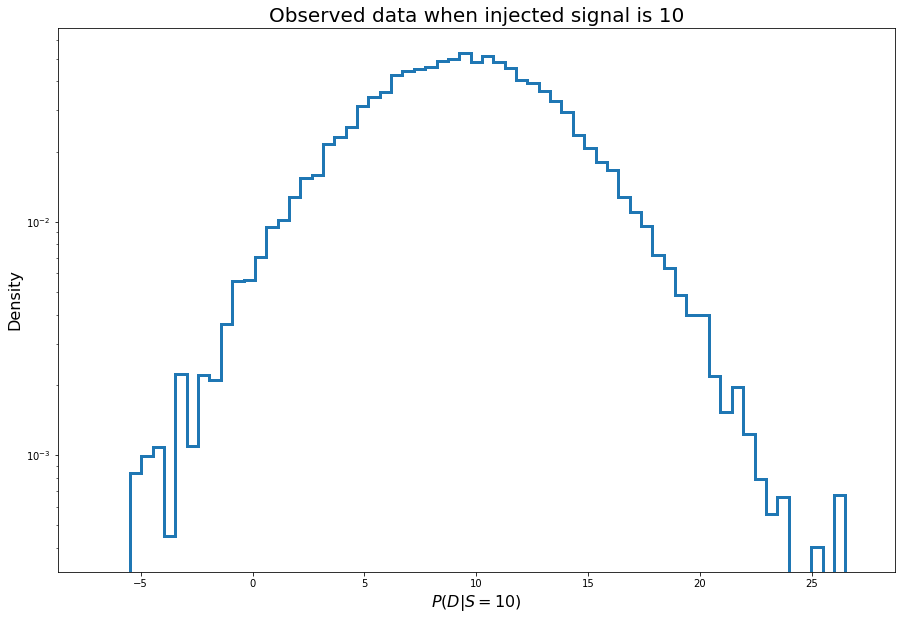

In [4]:
fig, ax = plt.subplots(1, 1)
ax.stairs(Psd.T[18]/sum(Psd.T), temp, lw=3)
ax.set_yscale('log')
ax.set_title('Observed data when injected signal is 10')
ax.set_xlabel(r'$P(D|S=10)$')
ax.set_ylabel('Density');

This plot shows us the probability mass function of what signal we will measure, given that the injected signal had a strength of 10.

### Part (c)

Now, we assume that we measure a data value of 10. We want to plot $P(S|D=10)$.

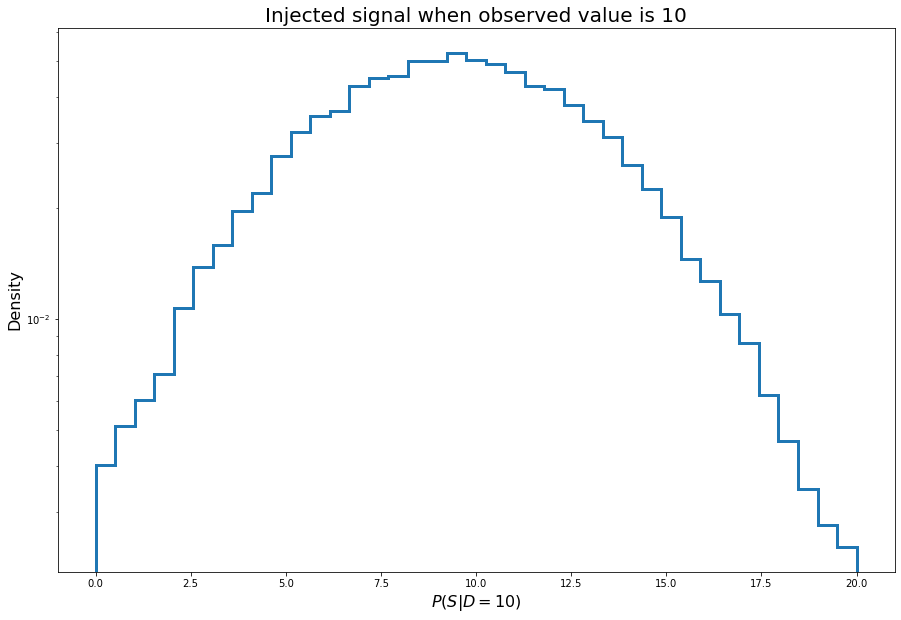

In [5]:
fig, ax = plt.subplots(1, 1)
ax.stairs(Psd[32]/sum(Psd), temp2, lw=3)
ax.set_yscale('log')
ax.set_title('Injected signal when observed value is 10')
ax.set_xlabel(r'$P(S|D=10)$')
ax.set_ylabel('Density');

This plot shows us the probability mass function of what signal we injected, given that the signal we measured had a strength of 10. For later comparison, we lastly overplot these two.

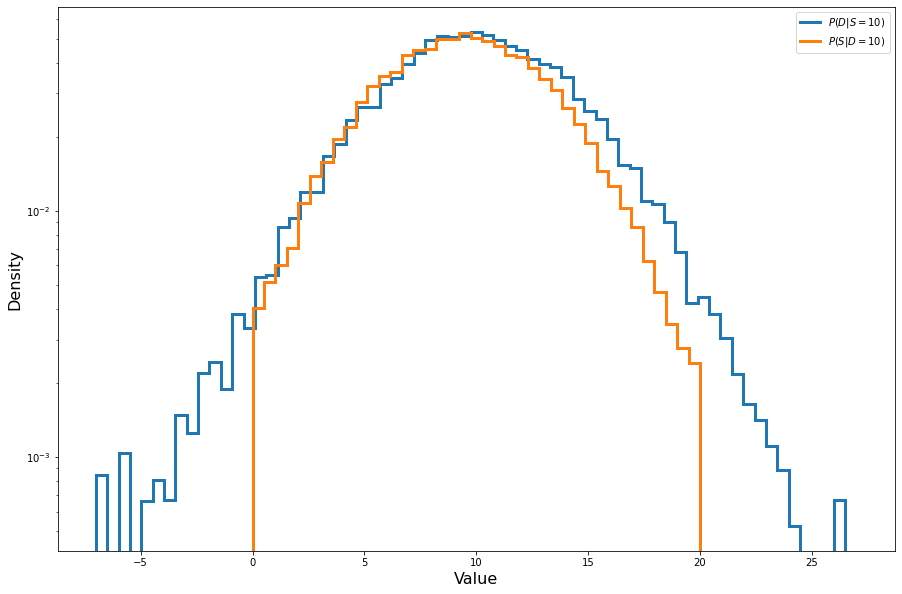

In [6]:
fig, ax = plt.subplots(1, 1)
ax.stairs(Psd.T[19]/sum(Psd.T), temp, lw=3, label=r'$P(D|S=10)$')
ax.stairs(Psd[32]/sum(Psd), temp2, lw=3, label=r'$P(S|D=10)$')
ax.set_yscale('log')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend(loc=0);

## Problem 2

Now, we want to carry out the same process but with a non-zero mean background. We take the same background from Problem 1, but shift the mean over $3\sigma$ to $\mu=12$ (arbitrarily, the important thing is it gets moved sufficiently far to make an appreciable difference).

In [7]:
bkgd = stats.norm.rvs(loc=12., scale=4., size=int(1e6))
sig  = stats.uniform.rvs(loc=0., scale=20., size=int(1e6))

data = bkgd + sig

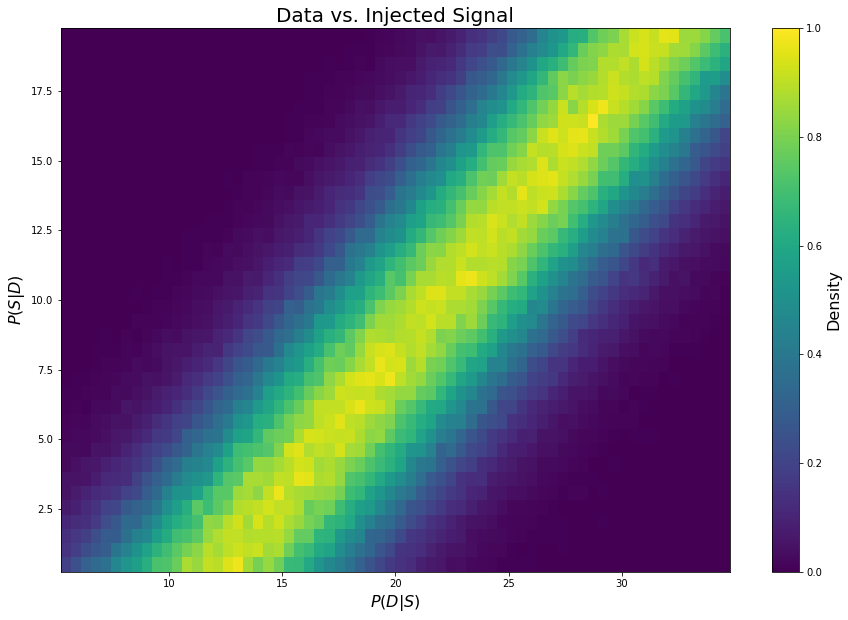

In [8]:
signaledges = np.linspace(0, 20, 40)
dataedges = np.linspace(5, 35, 68)

Psd, temp, temp2 = np.histogram2d(data, sig, bins=[dataedges, signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T)
plt.title('Data vs. Injected Signal')
plt.ylabel(r'$P(S|D)$')
plt.xlabel(r'$P(D|S)$')
plt.colorbar(plt.cm.ScalarMappable(), label='Density');

As we can see, we arrive at the same 2D histogram, but with a significant offset between injected signal values and observed values. We now make a stair plot of $P(D|S=15)$.

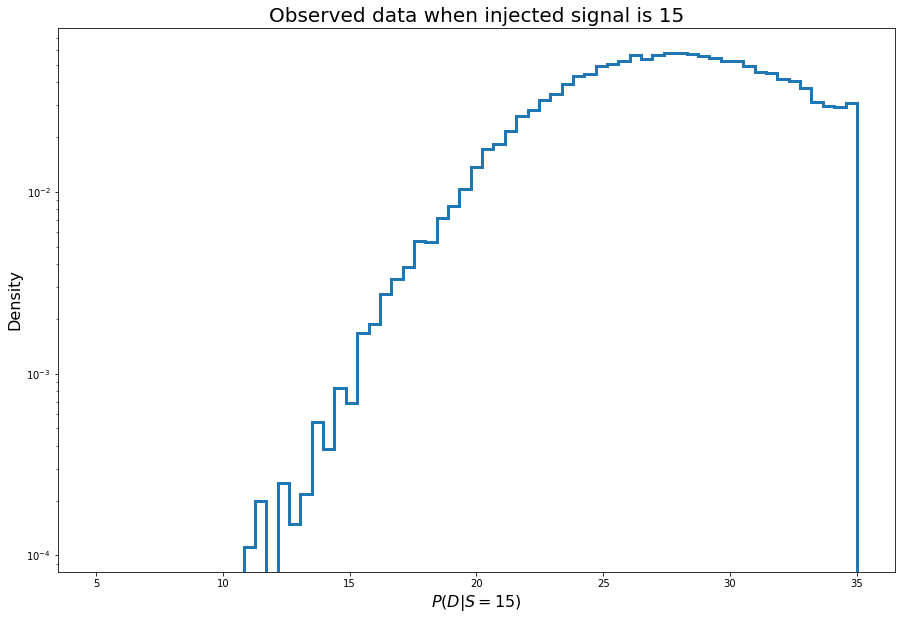

In [9]:
fig, ax = plt.subplots(1, 1)
ax.stairs(Psd.T[28]/sum(Psd.T), temp, lw=3)
ax.set_yscale('log')
ax.set_title('Observed data when injected signal is 15')
ax.set_xlabel(r'$P(D|S=15)$')
ax.set_ylabel('Density');

Now, $P(S|D=27)$.

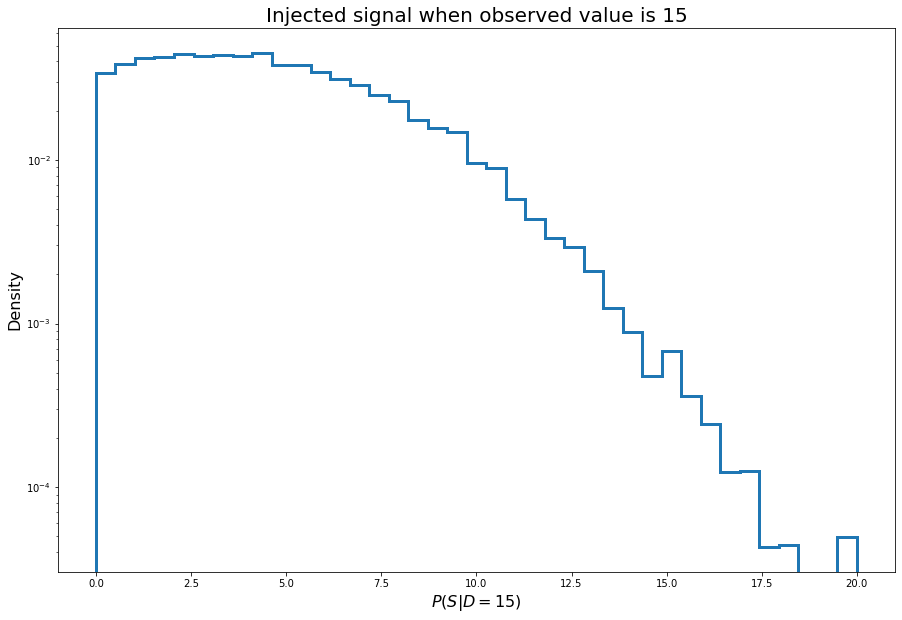

In [10]:
fig, ax = plt.subplots(1, 1)
ax.stairs(Psd[22]/sum(Psd), temp2, lw=3)
ax.set_yscale('log')
ax.set_title('Injected signal when observed value is 15')
ax.set_xlabel(r'$P(S|D=15)$')
ax.set_ylabel('Density');

Now, we overplot these two.

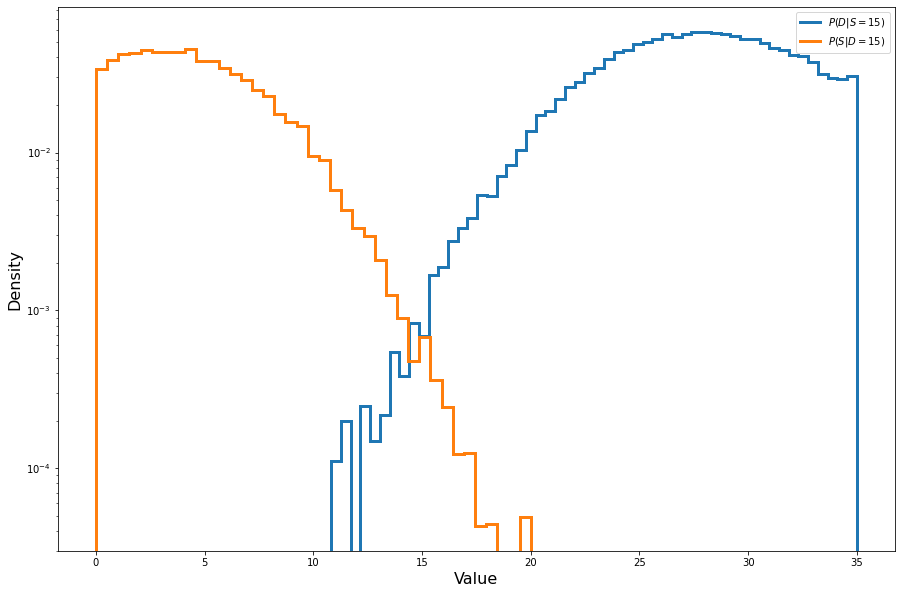

In [11]:
fig, ax = plt.subplots(1, 1)
ax.stairs(Psd.T[28]/sum(Psd.T), temp, lw=3, label=r'$P(D|S=15)$')
ax.stairs(Psd[22]/sum(Psd), temp2, lw=3, label=r'$P(S|D=15)$')
ax.set_yscale('log')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend(loc=0);

As anticipated, the plots are centered on different values. Unlike with our data in Problem 1, the background distribution here has a non-zero mean, meaning that when we inject a signal, the probability distribution of measured outcomes has a mean that is displaced by some amount from the original value. So, when we look at the possible data given an injected signal of 15 (blue curve), we have a distribution with mean $15 + \mu = 27$. And, when we look at the possible injected signals given a data value of 27 (orange curve), we have a distribution with mean $15 - \mu = 3$.